In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [2]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn import metrics

In [3]:
sns.set_theme(context='notebook', style='whitegrid', palette='Set2')

In [4]:
np.random.seed(7)

In [5]:
data = pd.read_csv('OnlineNewsPopularity.csv')

In [6]:
data.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [7]:
#sve kolone počinju sa praznim poljem, zbog dalje analzie potrebno je izbrisati ovo prazno polje

data.columns = data.columns.str.lstrip()

In [8]:
#kolone 'url' i 'timedelta' je potrebno ukloniti iz dalje analize

data = data.drop(labels=['url', 'timedelta'], axis=1)

In [9]:
data.head()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [10]:
#nall vrednosti nema ovom u skupu

data.isna().sum().sum()

0

In [11]:
data.shape

(39644, 59)

In [12]:
data.describe()

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
count,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,...,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000,39644.000000
mean,10.398749,546.514731,0.548216,0.996469,0.689175,10.883690,3.293638,4.544143,1.249874,4.548239,...,0.095446,0.756728,-0.259524,-0.521944,-0.107500,0.282353,0.071425,0.341843,0.156064,3395.380184
std,2.114037,471.107508,3.520708,5.231231,3.264816,11.332017,3.855141,8.309434,4.107855,0.844406,...,0.071315,0.247786,0.127726,0.290290,0.095373,0.324247,0.265450,0.188791,0.226294,11626.950749
min,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,0.000000,-1.000000,0.000000,0.000000,1.000000
25%,9.000000,246.000000,0.470870,1.000000,0.625739,4.000000,1.000000,1.000000,0.000000,4.478404,...,0.050000,0.600000,-0.328383,-0.700000,-0.125000,0.000000,0.000000,0.166667,0.000000,946.000000
50%,10.000000,409.000000,0.539226,1.000000,0.690476,8.000000,3.000000,1.000000,0.000000,4.664082,...,0.100000,0.800000,-0.253333,-0.500000,-0.100000,0.150000,0.000000,0.500000,0.000000,1400.000000
75%,12.000000,716.000000,0.608696,1.000000,0.754630,14.000000,4.000000,4.000000,1.000000,4.854839,...,0.100000,1.000000,-0.186905,-0.300000,-0.050000,0.500000,0.150000,0.500000,0.250000,2800.000000
max,23.000000,8474.000000,701.000000,1042.000000,650.000000,304.000000,116.000000,128.000000,91.000000,8.041534,...,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.500000,1.000000,843300.000000


In [13]:
data.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

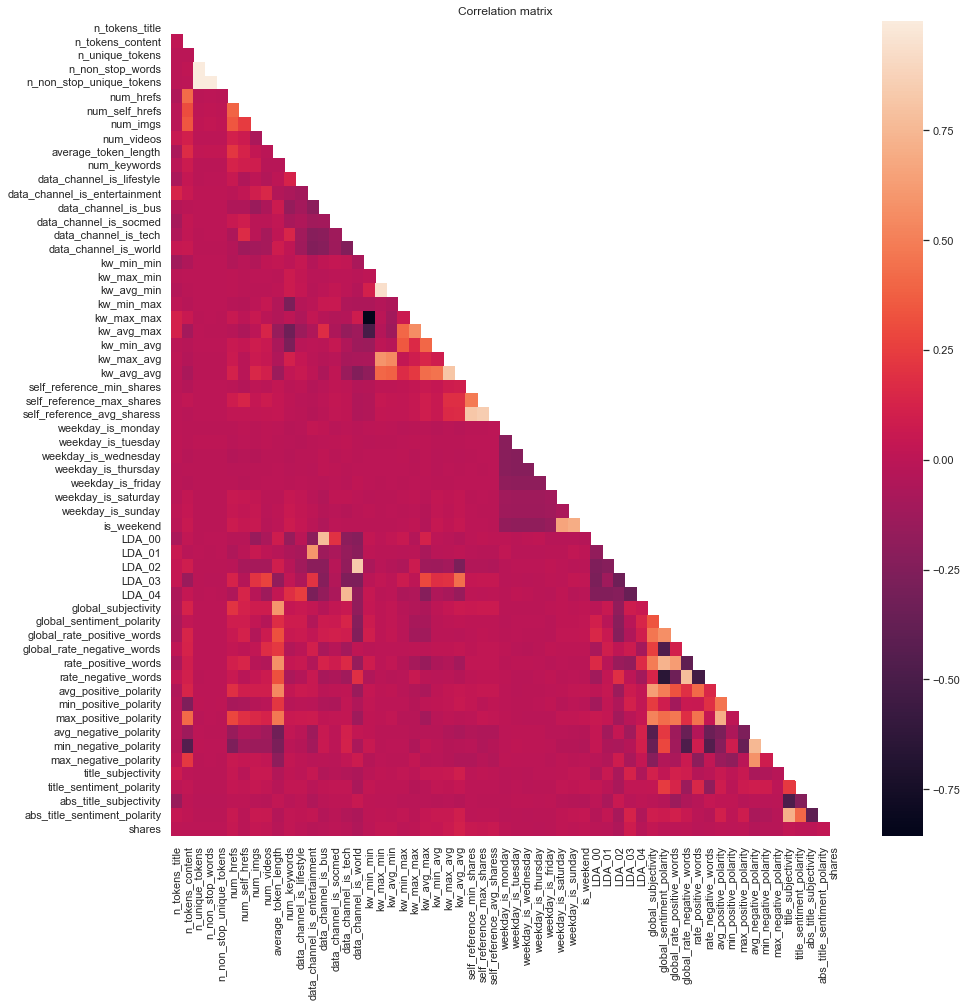

In [14]:
corr =  data.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(), mask = mask)

plt.title('Correlation matrix')
plt.show()

In [15]:
data.shares.describe()

count     39644.000000
mean       3395.380184
std       11626.950749
min           1.000000
25%         946.000000
50%        1400.000000
75%        2800.000000
max      843300.000000
Name: shares, dtype: float64

In [16]:
categories = ['Unpopular', 'Popular']
data['category'] = pd.qcut(data['shares'], q=[0,0.50,1], labels=categories)

In [17]:
#categories = ['Very Bad', 'Bad', 'Average', 'Good', 'Very Good', 'Excellent', 'Exceptional']
#data['category'] = pd.qcut(data['shares'], q=[0, 0.05, 0.15, 0.35, 0.65, 0.85, 0.95, 1], labels=categories)

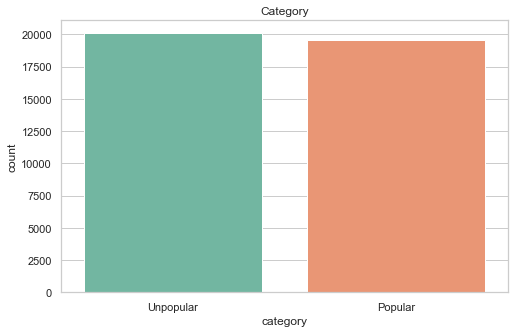

In [18]:
fig = plt.figure(figsize=[8,5])
sns.countplot(x='category',data=data)
plt.title('Category')
plt.show()

In [19]:
days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
data['day'] =''
data['day'] = np.where(data['weekday_is_monday'] == 1, days[0], data['day'])
data['day'] = np.where(data['weekday_is_tuesday'] == 1, days[1], data['day'])
data['day'] = np.where(data['weekday_is_wednesday'] == 1, days[2], data['day'])
data['day'] = np.where(data['weekday_is_thursday'] == 1, days[3], data['day'])
data['day'] = np.where(data['weekday_is_friday'] == 1, days[4], data['day'])
data['day'] = np.where(data['weekday_is_saturday'] == 1, days[5], data['day'])
data['day'] = np.where(data['weekday_is_sunday'] == 1, days[6], data['day'])


In [20]:
channels = ['Lifestyle','Entertainment', 'Business', 'Social Media', 'Tech', 'World', 'Other']
data['channels'] = ''
data['channels'] = np.where(data['data_channel_is_lifestyle'] == 1, channels[0], data['channels'])
data['channels'] = np.where(data['data_channel_is_entertainment'] == 1, channels[1], data['channels'])
data['channels'] = np.where(data['data_channel_is_bus'] == 1, channels[2], data['channels'])
data['channels'] = np.where(data['data_channel_is_socmed'] == 1, channels[3], data['channels'])
data['channels'] = np.where(data['data_channel_is_tech'] == 1, channels[4], data['channels'])
data['channels'] = np.where(data['data_channel_is_world'] == 1, channels[5], data['channels'])
data['channels'] = np.where((data['data_channel_is_lifestyle'] == 0) &
                            (data['data_channel_is_entertainment'] == 0) &
                            (data['data_channel_is_bus'] == 0) &
                            (data['data_channel_is_socmed'] == 0) &
                            (data['data_channel_is_tech'] == 0) &
                            (data['data_channel_is_world'] == 0),
                            'Other', data['channels'])

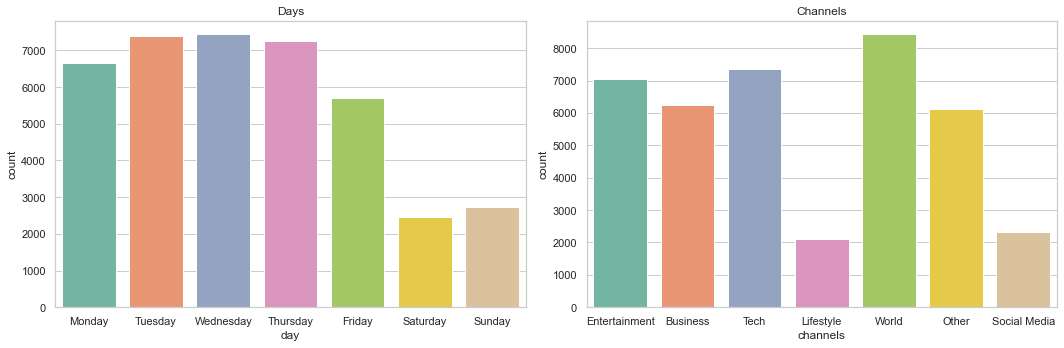

In [21]:
fig = plt.figure(figsize=[15,5])

fig.add_subplot(1, 2, 1)
sns.countplot(x='day',data=data)
plt.title('Days')

fig.add_subplot(1, 2, 2)
sns.countplot(x='channels',data=data)
plt.title('Channels')

plt.tight_layout()
plt.show()

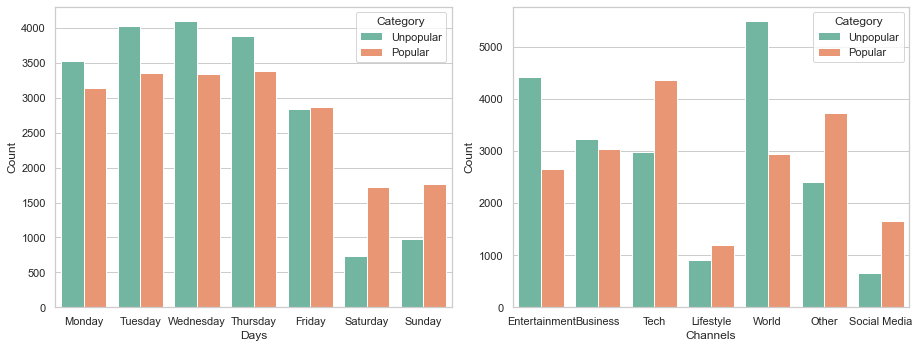

In [22]:
fig = plt.figure(figsize=[13,5])

fig.add_subplot(1, 2, 1)
sns.countplot(x='day', hue='category', data=data)
plt.xlabel('Days')
plt.ylabel('Count')
plt.legend(title='Category')

fig.add_subplot(1, 2, 2)
sns.countplot(x='channels', hue='category', data=data)
plt.xlabel('Channels')
plt.ylabel('Count')
plt.legend(title='Category')

plt.tight_layout()
plt.show()

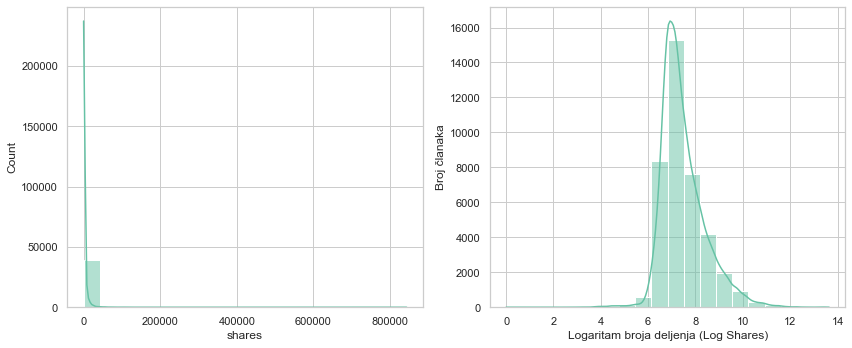

In [23]:
fig = plt.figure(figsize=[12, 5])

fig.add_subplot(1, 2, 1)
sns.histplot(data.shares, bins=20, kde=True)

shares_log = np.log(data.shares)

fig.add_subplot(1, 2, 2)
sns.histplot(shares_log, bins=20,edgecolor='white', kde=True)
plt.xlabel('Logaritam broja deljenja (Log Shares)')
plt.ylabel('Broj članaka')

plt.tight_layout()
plt.show()

### KNN

In [24]:
data.columns

Index(['n_tokens_title', 'n_tokens_content', 'n_unique_tokens',
       'n_non_stop_words', 'n_non_stop_unique_tokens', 'num_hrefs',
       'num_self_hrefs', 'num_imgs', 'num_videos', 'average_token_length',
       'num_keywords', 'data_channel_is_lifestyle',
       'data_channel_is_entertainment', 'data_channel_is_bus',
       'data_channel_is_socmed', 'data_channel_is_tech',
       'data_channel_is_world', 'kw_min_min', 'kw_max_min', 'kw_avg_min',
       'kw_min_max', 'kw_max_max', 'kw_avg_max', 'kw_min_avg', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'weekday_is_monday', 'weekday_is_tuesday',
       'weekday_is_wednesday', 'weekday_is_thursday', 'weekday_is_friday',
       'weekday_is_saturday', 'weekday_is_sunday', 'is_weekend', 'LDA_00',
       'LDA_01', 'LDA_02', 'LDA_03', 'LDA_04', 'global_subjectivity',
       'global_sentiment_polarity', 'global_rate_positive_words',
       'global_rate_negat

In [25]:
correlation_matrix_shares = data.corr()['shares'].abs()
sorted_correlation = correlation_matrix_shares.sort_values(ascending=False)
sorted_correlation

shares                           1.000000
kw_avg_avg                       0.110413
LDA_03                           0.083771
kw_max_avg                       0.064306
LDA_02                           0.059163
self_reference_avg_sharess       0.057789
self_reference_min_shares        0.055958
data_channel_is_world            0.049497
self_reference_max_shares        0.047115
num_hrefs                        0.045404
kw_avg_max                       0.044686
kw_min_avg                       0.039551
num_imgs                         0.039388
avg_negative_polarity            0.032029
global_subjectivity              0.031604
kw_avg_min                       0.030406
kw_max_min                       0.030114
abs_title_sentiment_polarity     0.027135
num_videos                       0.023936
average_token_length             0.022007
title_subjectivity               0.021967
num_keywords                     0.021818
max_negative_polarity            0.019300
min_negative_polarity            0

In [26]:
to_drop = correlation_matrix_shares[correlation_matrix_shares < 0.04].index.tolist()

In [27]:
data[to_drop]

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,2.0,1.0,0.0,4.680365,5.0,...,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,1.0,1.0,0.0,4.913725,4.0,...,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,1.0,1.0,0.0,4.393365,6.0,...,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,0.0,1.0,0.0,4.404896,7.0,...,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,20.0,0.0,4.682836,7.0,...,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,7.0,1.0,1.0,4.523121,8.0,...,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,12.0,328.0,0.696296,1.0,0.885057,7.0,3.0,48.0,4.405488,7.0,...,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,10.0,442.0,0.516355,1.0,0.644128,1.0,12.0,1.0,5.076923,8.0,...,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,6.0,682.0,0.539493,1.0,0.692661,1.0,1.0,0.0,4.975073,5.0,...,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


In [28]:
y = data.category
x = data.drop(data[to_drop], axis = 1)

In [29]:
x.columns

Index(['num_hrefs', 'data_channel_is_world', 'kw_avg_max', 'kw_max_avg',
       'kw_avg_avg', 'self_reference_min_shares', 'self_reference_max_shares',
       'self_reference_avg_sharess', 'LDA_02', 'LDA_03', 'shares', 'category',
       'day', 'channels'],
      dtype='object')

In [30]:
x = x.drop(labels=['shares', 'category', 'day', 'channels'], axis = 1)
x

,num_hrefs,data_channel_is_world,kw_avg_max,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,LDA_02,LDA_03
0,4.0,0.0,0.000000,0.000000,0.000000,496.0,496.0,496.000000,0.040005,0.041263
1,3.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.050096,0.050101
2,3.0,0.0,0.000000,0.000000,0.000000,918.0,918.0,918.000000,0.033351,0.033334
3,9.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.494651,0.028905
4,19.0,0.0,0.000000,0.000000,0.000000,545.0,16000.0,3151.157895,0.028575,0.028572
...,...,...,...,...,...,...,...,...,...,...
39639,9.0,0.0,374962.500000,4004.342857,3031.115764,11400.0,48000.0,37033.333333,0.151701,0.025000
39640,9.0,0.0,192985.714286,5470.168651,3411.660830,2100.0,2100.0,2100.000000,0.231866,0.681635
39641,24.0,0.0,295850.000000,6880.687034,4206.439195,1400.0,1400.0,1400.000000,0.025207,0.643794
39642,10.0,1.0,254600.000000,3384.316871,1777.895883,452.0,452.0,452.000000,0.839987,0.040002


In [31]:
x_train_validation, x_test, y_train_validation, y_test = model_selection.train_test_split(x, y, test_size=0.3, random_state=7)

In [32]:
x_train, x_validation, y_train, y_validation = model_selection.train_test_split(x_train_validation, y_train_validation, train_size=0.7, random_state=7)

In [33]:
scaler = preprocessing.MinMaxScaler()

In [34]:
scaler.fit(x_train)

MinMaxScaler()

In [35]:
x_train=scaler.transform(x_train)
x_validation = scaler.transform(x_validation)
x_train_validation = scaler.transform(x_train_validation)
x_test=scaler.transform(x_test)

In [36]:
#n_neighbors = list(range(5,50)) 
weights = ['uniform', 'distance']
metric = ['minkowski','euclidean','manhattan']
best_score = 0
best_params = {'n_neighbors' : 4,
              'weights' : ['uniform'],
              'metric' : ['minkowski']}

for i in range(30,80):
    for w in weights:
        for m in metric:
            model = KNeighborsClassifier(n_neighbors=i, weights = w, metric = m)
            model.fit(x_train, y_train)
            y_val_predict = model.predict(x_validation)
            accuracy = metrics.accuracy_score(y_validation, y_val_predict)
            #print(accuracy)
            if accuracy > best_score:
                best_score = accuracy
                best_params['n_neighbors'] = i
                best_params['weights'] = w
                best_params['metric'] = m
           # print(best_params)
print('Best score is ', best_score)
print('Best param is ', best_params)

Best score is  0.6288288288288288
Best param is  {'n_neighbors': 76, 'weights': 'distance', 'metric': 'manhattan'}


In [37]:
final_model_KNN = KNeighborsClassifier(
                n_neighbors= best_params['n_neighbors'], weights=best_params['weights'], metric=best_params['metric'])

In [38]:
final_model_KNN.fit(x_train_validation, y_train_validation)

KNeighborsClassifier(metric='manhattan', n_neighbors=76, weights='distance')

In [39]:
y_test_predicted_KNN = final_model_KNN.predict(x_test)

In [40]:
print('Podaci za KNN')
print('Preciznost za test skup: ', metrics.accuracy_score(y_test, y_test_predicted_KNN))
print('')
print("Izveštaj klasifikacije za test skup \n",metrics.classification_report(y_test,y_test_predicted_KNN))

Podaci za KNN
Preciznost za test skup:  0.61282999831848

Izveštaj klasifikacije za test skup 
               precision    recall  f1-score   support

     Popular       0.61      0.57      0.59      5841
   Unpopular       0.61      0.66      0.63      6053

    accuracy                           0.61     11894
   macro avg       0.61      0.61      0.61     11894
weighted avg       0.61      0.61      0.61     11894



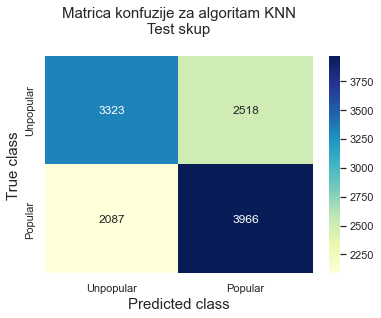

In [41]:
mc_test = metrics.confusion_matrix(y_test, y_test_predicted_KNN)
labels = categories
sns.heatmap(mc_test, cmap='YlGnBu', annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.title('Matrica konfuzije za algoritam KNN\n Test skup \n', fontsize= 15)
plt.xlabel('Predicted class', fontsize = 15) 
plt.ylabel('True class', fontsize = 15)

plt.show()

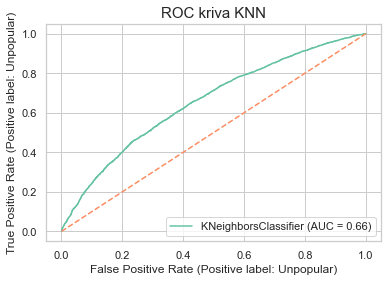

In [42]:
metrics.RocCurveDisplay.from_estimator(final_model_KNN, x_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC kriva KNN', fontsize= 15)

plt.show()

### SVM

In [43]:
Cs = [0.1, 0.3, 0.5, 1, 3, 5, 10, 15, 20]
kernels = ['linear', 'rbf']

best_score = 0
best_params = {'C' : 0, 
               'kernel' : ['linear']}

for C in Cs :
    for k in kernels:
        model = SVC(C = C, kernel=k)
        model.fit(x_train, y_train)
        y_val_predict = model.predict(x_validation)
        accuracy = metrics.accuracy_score(y_validation, y_val_predict)
        
        if accuracy > best_score:
            best_score = accuracy
            best_params['C'] = C
            best_params['kernel'] = k
            
print('Best score is ', best_score)
print('Best param is ', best_params)

Best score is  0.6186186186186187
Best param is  {'C': 5, 'kernel': 'rbf'}


In [44]:
final_model_SVC = SVC(C=best_params['C'], kernel = best_params['kernel'])

In [45]:
final_model_SVC.fit(x_train_validation, y_train_validation)

SVC(C=5)

In [46]:
y_pred_test_SVC = final_model_SVC.predict(x_test)

In [47]:
mc_test_SVC = metrics.confusion_matrix(y_test, y_pred_test_SVC)

In [48]:
print('Podaci za SVC')
print('Preciznost za test skup: ', metrics.accuracy_score(y_test, y_pred_test_SVC))
print('')
print("Izveštaj klasifikacije za test skup \n",metrics.classification_report(y_test,y_pred_test_SVC))

Podaci za SVC
Preciznost za test skup:  0.6178745586009753

Izveštaj klasifikacije za test skup 
               precision    recall  f1-score   support

     Popular       0.62      0.58      0.60      5841
   Unpopular       0.62      0.65      0.63      6053

    accuracy                           0.62     11894
   macro avg       0.62      0.62      0.62     11894
weighted avg       0.62      0.62      0.62     11894



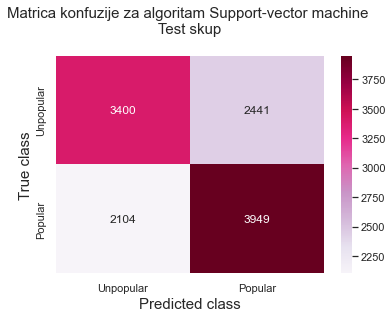

In [49]:
sns.heatmap(mc_test_SVC, cmap='PuRd',annot=True, fmt="d", xticklabels=labels, yticklabels=labels)
plt.title('Matrica konfuzije za algoritam Support-vector machine \n Test skup \n', fontsize= 15)
plt.xlabel('Predicted class', fontsize = 15) 
plt.ylabel('True class', fontsize = 15)

plt.show()

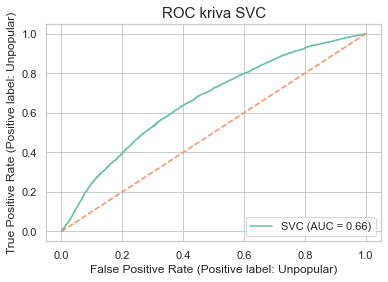

In [50]:
metrics.RocCurveDisplay.from_estimator(final_model_SVC, x_test, y_test)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('ROC kriva SVC', fontsize= 15)

plt.show()